In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [25]:
zoo = pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
zoo_data = zoo.drop(columns = ['animal name'])
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [9]:
zoo_data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [13]:
x = zoo_data.iloc[:,:-1]
y = zoo_data.iloc[:,-1]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### K-Neighbors without Hyper-Parameter Tuning

In [18]:
k = np.sqrt(zoo_data.shape[0]/2)
k

7.106335201775948

In [19]:
knn = KNeighborsClassifier(n_neighbors = 7)
model = knn.fit(x_train, y_train)

In [21]:
y_pred = model.predict(x_test)
y_pred

array([4, 2, 6, 1, 2, 4, 1, 2, 1, 1, 3, 6, 2, 1, 1, 6, 2, 4, 1, 4, 1, 1,
       4, 2, 1, 2, 4, 1, 2, 1, 6])

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         0
           4       0.50      1.00      0.67         3
           5       0.00      0.00      0.00         2
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         4

    accuracy                           0.77        31
   macro avg       0.42      0.56      0.46        31
weighted avg       0.69      0.77      0.72        31



### K-Neighbors Classifier with Hyper-parameter Tuning

In [28]:
KNN = KNeighborsClassifier()
param_grid = dict(n_neighbors = range(1, 7))
model = GridSearchCV(KNN, param_grid, refit = True, verbose = 3)

In [30]:
model.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.929 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.929 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.929 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.929 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.929 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.857 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.857 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.857 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 7)}, verbose=3)

In [31]:
model.best_params_

{'n_neighbors': 1}

In [32]:
model.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [33]:
# Model Predictions using test data
y_predicted = model.predict(x_test)
y_predicted

array([7, 2, 6, 1, 2, 4, 1, 2, 1, 1, 5, 7, 2, 1, 1, 6, 2, 4, 5, 7, 1, 1,
       1, 2, 1, 2, 4, 1, 2, 1, 6])

In [34]:
# print classification report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       1.00      0.75      0.86         4

    accuracy                           0.97        31
   macro avg       0.94      0.96      0.94        31
weighted avg       0.98      0.97      0.97        31



## Visualizing CV Results

In [35]:
k_range = range(1, 7)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())

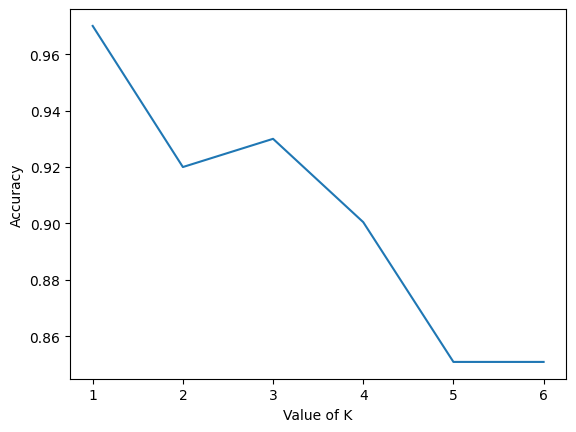

In [36]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

Text(0, 0.5, 'Error Rate')

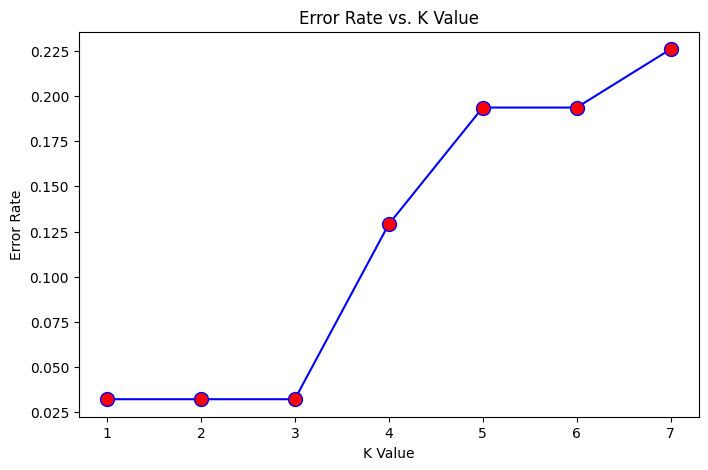

In [45]:
# Plot Error rate vs K value
plt.figure(figsize=(8,5))

error_rate = []
for i in range(1, 8):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1, 8), error_rate, color ='blue', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

We can see k = 1, has least error and best accuracy

In [48]:
# Now with k=1:

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[12  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  3]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       1.00      0.75      0.86         4

    accuracy                           0.97        31
   macro avg       0.94      0.96      0.94        31
weighted avg       0.98      0.97      0.97        31

